## Diamond Price Prediction

### The 4Cs
`The 4Cs stand for carat weight, color, clarity and cut.`

<img width="800" height="1000" src="images/carat.png">

<img width="800" height="1000" src="images/color.png">

<img width="800" height="1000" src="images/clarity.png">

<img width="800" height="1000" src="images/cut.png">

**Credits -** https://www.igi.org/consumer-education/diamond-4cs/

#### Data Description

| Feature | Description |
| :---: | :--- | 
| **price** | price in US dollars `($ 326 - $ 18,823)` |
| **carat** | weight of the diamond `(0.2 - 5.01)` |
| **cut** | quality of the cut `(Fair, Good, Very Good, Premium, Ideal)` |
| **color** | diamond colour `(J (worst) to D (best))` |
| **clarity** | a measurement of how clear the diamond is `(I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))` |
| **x** | length in mm `(0 - 10.74)` |
| **y** | width in mm `(0 - 58.9)` |
| **z** | depth in mm `(0 - 31.8)` |
| **depth** | total depth percentage = z / mean(x, y) = 2 * z / (x + y) `(43 - 79)` |
| **table** | width of top of diamond relative to widest point `(43 - 95)` |

### 1. Import the required libraries

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### 2. Data Understanding

In [2]:
df = pd.read_csv("diamonds.csv")

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
print(f"Columns: {df.shape[1]}, Rows: {df.shape[0]}")

Columns: 10, Rows: 53940


In [4]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [5]:
df["cut"].nunique()

5

In [6]:
df["color"].nunique()

7

In [7]:
df["clarity"].nunique()

8

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [9]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [10]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

### Exploratory Data Analysis (EDA)

### 3. Univariate Analysis

In [11]:
# categorical analysis
def get_cat_univariate(columns):
    fig, axs = plt.subplots(1, 3, figsize=(12, 3), constrained_layout=True)
    fig.suptitle("Univariate Plotting - Categorical Features")

    for i, col in enumerate(columns):
        axs[i].set_title(col)
        sns.countplot(data=df, x=col, ax=axs[i])

In [12]:
df.select_dtypes(include=['object']).head()

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2


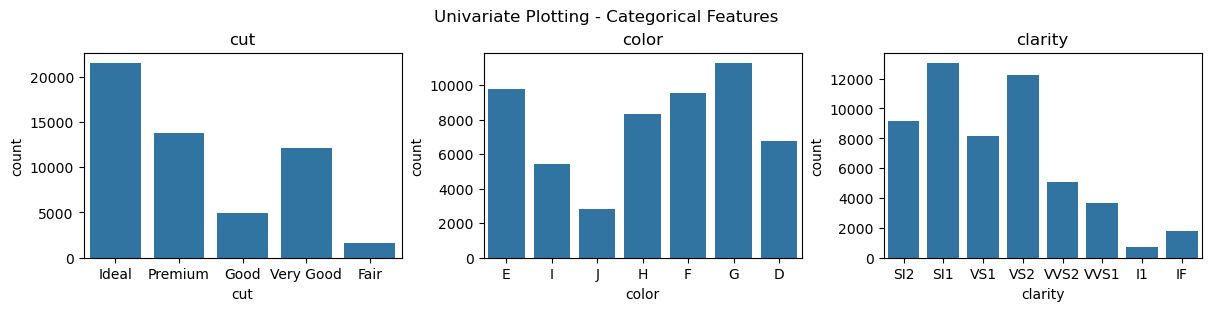

In [13]:
cat_cols = ["cut", "color", "clarity"]

get_cat_univariate(cat_cols)

In [14]:
# numerical analysis
def get_num_univariate(columns):
    fig, axs = plt.subplots(1, 3, figsize=(12, 3), constrained_layout=True)
    fig.suptitle("Univariate Plotting - Numerical Features")

    for i, col in enumerate(columns):
        axs[i].set_title(col)
        sns.histplot(data=df, x=col, ax=axs[i])

In [15]:
df.select_dtypes(include=['int64', 'float64']).head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


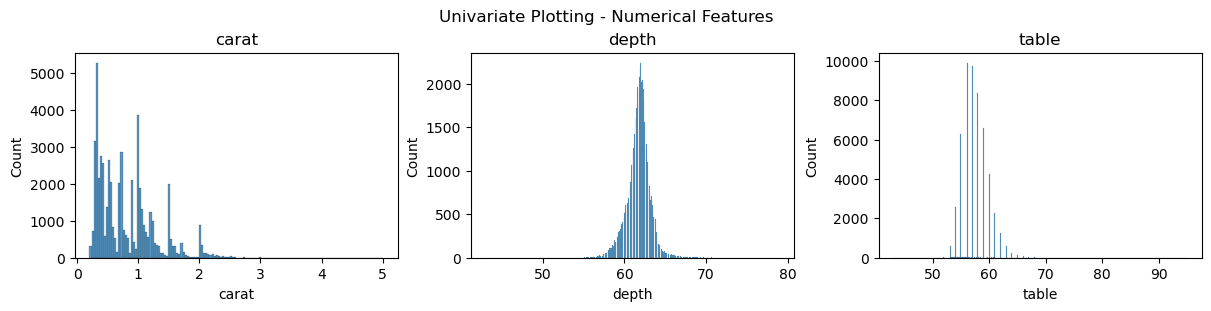

In [16]:
num_cols = ["carat", "depth", "table", "x", "y", "z"] # excluding target i.e., price

get_num_univariate(num_cols[:3])

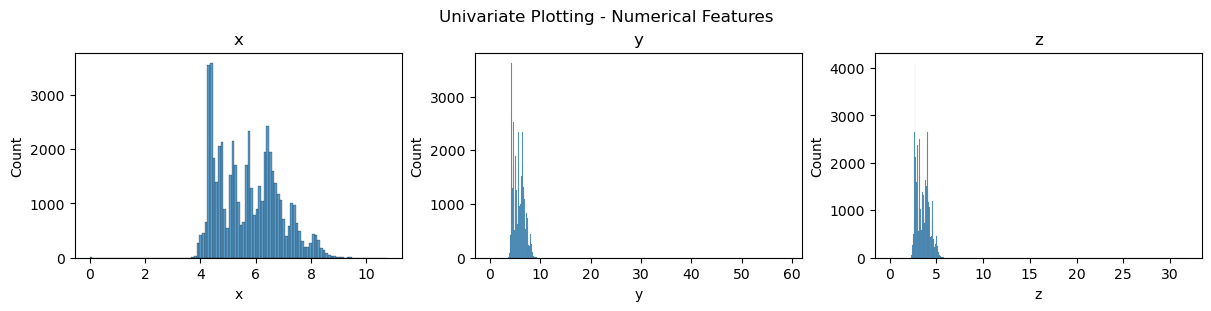

In [17]:
get_num_univariate(num_cols[3:])

### 4. Bivariate Analysis

In [18]:
# Numerical vs Numerical Analysis

def get_num_num_scatterplot(num_cols, target):
    fig, axs = plt.subplots(1, 3, figsize=(10, 3), constrained_layout=True)
    fig.suptitle("Numerical vs Numerical Analysis")

    for i, col in enumerate(num_cols):
        axs[i].set_title(f"{col} vs Price")
        sns.scatterplot(data=df, x=col, y=target, ax=axs[i])

In [19]:
num_cols

['carat', 'depth', 'table', 'x', 'y', 'z']

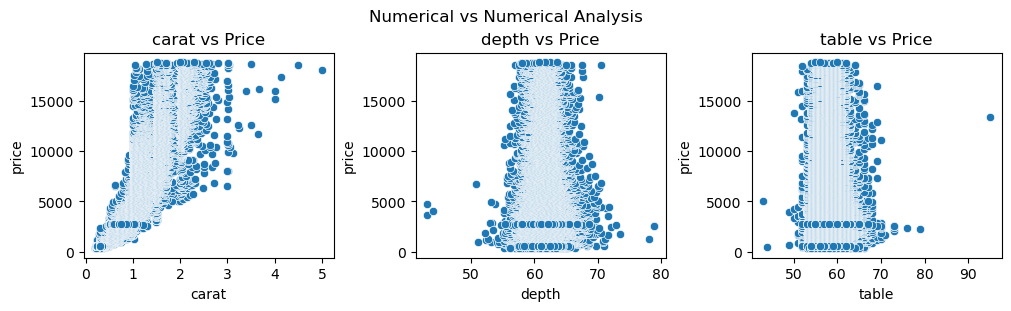

In [20]:
get_num_num_scatterplot(num_cols[:3], 'price')

In [21]:
df[['carat', 'depth', 'table', 'price']].corr()

,carat,depth,table,price
carat,1.000000,0.028224,0.181618,0.921591
depth,0.028224,1.000000,-0.295779,-0.010647
table,0.181618,-0.295779,1.000000,0.127134
price,0.921591,-0.010647,0.127134,1.000000


**Insights:** `Carat` vs `Price` has a `Positive Correlation`, meaning it has a direct impact on the price, making it a significant predictor of diamond price.

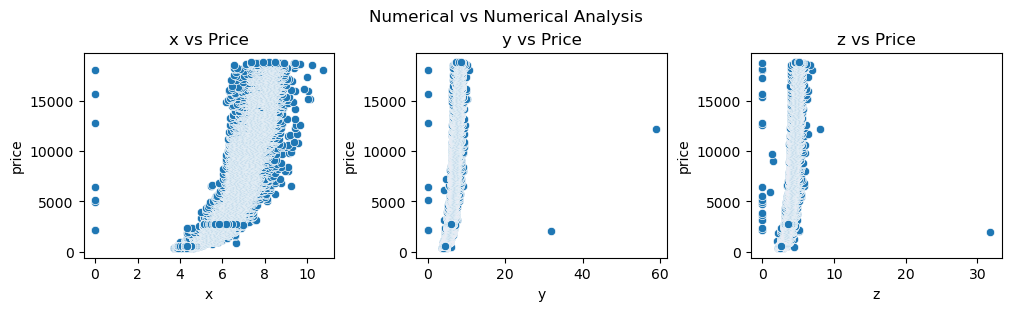

In [22]:
get_num_num_scatterplot(num_cols[3:], 'price')

**Insights:** `x (Length)` vs `Price` has a `Positive Correlation` with price, making it a potential predictor of price, similar to carat

Also, we might need to clean up the outliers and check for any inconsistent data in the features.

#### Handling outliers

In [23]:
# Visualizing outliers using boxplots

def get_num_num_boxplot(features):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    for i, feature in enumerate(features):
        sns.boxplot(data=df, y=feature, ax=axs[i])
        axs[i].set_title(f'{feature} column')

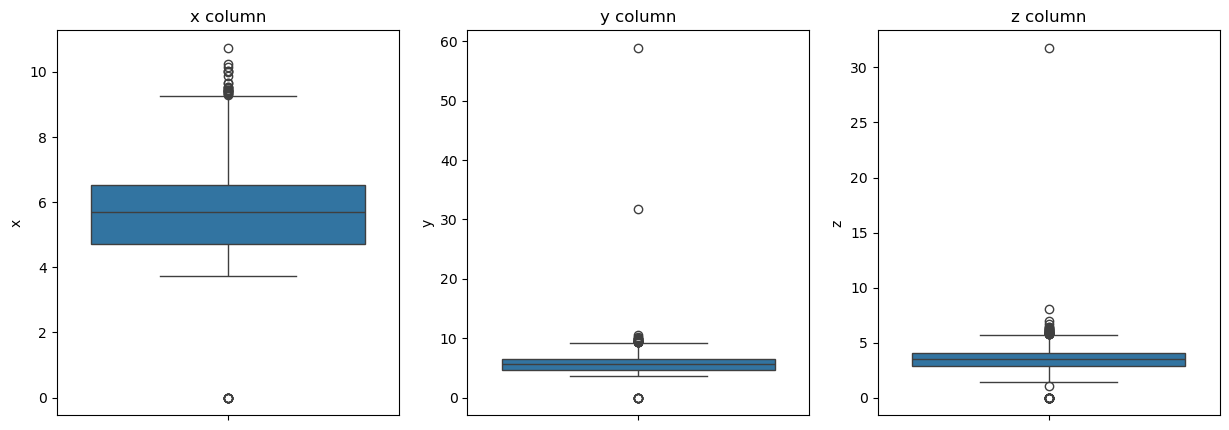

In [24]:
get_num_num_boxplot(['x', 'y', 'z'])

In [25]:
df.shape

(53940, 10)

In [26]:
# for x
df = df.loc[df['x'] > 3]

# for y
df = df.loc[df['y'] < 15]

# for z
df = df.loc[df['z'] < 10]
df = df.loc[df['z'] > 2]

df.shape

(53914, 10)

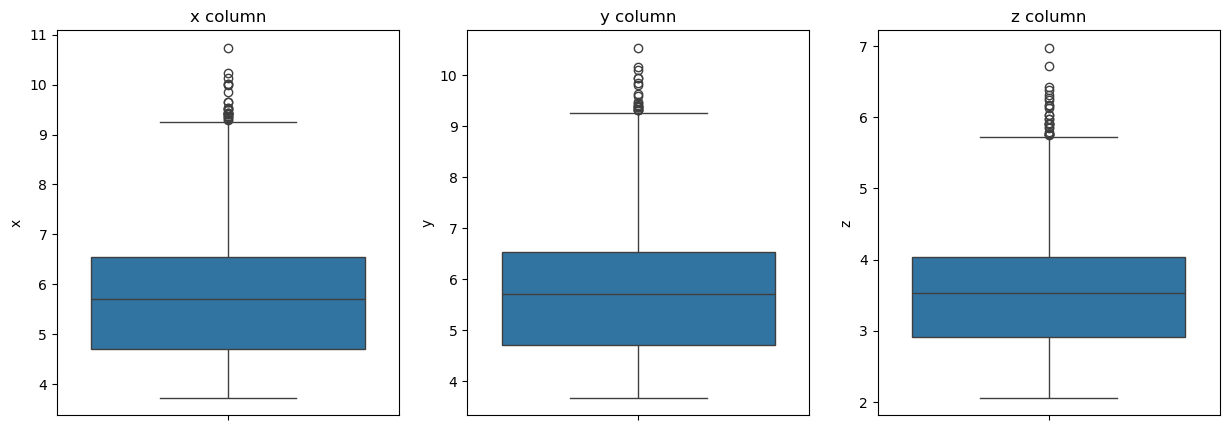

In [27]:
get_num_num_boxplot(num_cols[3:])

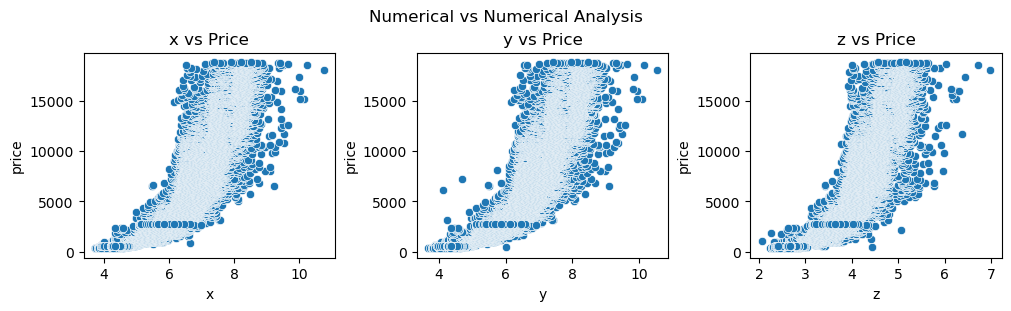

In [28]:
get_num_num_scatterplot(num_cols[3:], 'price')

In [29]:
# Numerical vs Categorical Analysis

def get_num_cat_boxplot(cat_cols, target):
    fig, axs = plt.subplots(1, 3, figsize=(10, 3), constrained_layout=True)
    fig.suptitle("Numerical vs Categorical Analysis")

    for i, col in enumerate(cat_cols):
        axs[i].set_title(f"{col} vs Price")
        sns.boxplot(data=df, x=target, y=col, ax=axs[i])

In [30]:
cat_cols

['cut', 'color', 'clarity']

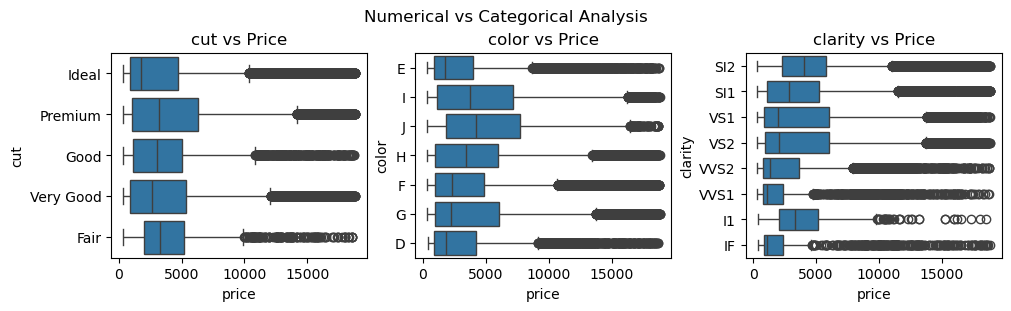

In [31]:
get_num_cat_boxplot(cat_cols, 'price')

**Insights:** `Cut` and `clarity` have a more distinct relationship with `price`, where higher quality is generally associated with higher prices.

### Data Preparation

### 5. Segregate Inputs and Output

In [32]:
# inputs (x)
X = df.drop(columns=['price'])

X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


In [33]:
# output (y)
y = df['price']

y.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

### 6. Split the data into train and test

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print(f" X train size: {X_train.shape},\n y train size:{y_train.shape},\n X test size: {X_test.shape},\n y test size: {y_test.shape}")

 X train size: (40435, 9),
 y train size:(40435,),
 X test size: (13479, 9),
 y test size: (13479,)


### 7. Feature Engineering/Extraction/Transformation

First, we will separate Numerical and Categorical Features

In [35]:
X_train.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
dtype: object

In [36]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])
X_train_cat = X_train.select_dtypes(include=['object'])

In [37]:
X_train_num.head()

,carat,depth,table,x,y,z
30507,0.31,63.0,55.0,4.34,4.32,2.73
53792,0.51,62.5,54.0,5.12,5.16,3.21
25776,2.01,63.0,60.0,7.92,7.99,5.01
40270,0.37,61.6,56.0,4.61,4.65,2.85
45428,0.54,61.8,56.0,5.22,5.23,3.23


In [38]:
X_train_cat.head()

,cut,color,clarity
30507,Ideal,D,SI1
53792,Ideal,F,IF
25776,Good,G,SI2
40270,Very Good,E,SI2
45428,Ideal,F,SI1


#### i) Transformation on train data

**Numerical Feature Transformation: Applying Standardization**

**Note:**
1. **Normalization:** "Scales the data to a fixed range". import -> `MinMaxScaler`
2. **Standardization:** "Scales the data so that it has a mean of 0 and std of 1". import -> `StandardScaler`

In [39]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

std_scaler

StandardScaler()

Column names will be lost after Scaling, so lets use `std_scaler.get_feature_names_out()`

Also, it will converted to a numpy ndarray so lets use pandas to save it into a dataframe

**Important:** `fit_transform()` on X_train, and `transform()` on X_test

In [40]:
X_train_num_transformed = pd.DataFrame(std_scaler.fit_transform(X_train_num),
                                      columns = std_scaler.get_feature_names_out(),
                                      index = X_train_num.index)

X_train_num_transformed.head()

,carat,depth,table,x,y,z
30507,-1.028416,0.872364,-1.102759,-1.242999,-1.271905,-1.170699
53792,-0.606541,0.523185,-1.550066,-0.546087,-0.515746,-0.476363
25776,2.557525,0.872364,1.133778,1.955649,2.031792,2.127398
40270,-0.901854,-0.105336,-0.655452,-1.001760,-0.974842,-0.997115
45428,-0.543259,0.034335,-0.655452,-0.456739,-0.452732,-0.447432


In [41]:
X_train_num_transformed.describe().round(2)

,carat,depth,table,x,y,z
count,40435.00,40435.00,40435.00,40435.00,40435.00,40435.00
mean,-0.00,-0.00,-0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.26,-13.09,-6.47,-1.79,-1.85,-2.14
25%,-0.84,-0.52,-0.66,-0.91,-0.91,-0.91
50%,-0.21,0.03,-0.21,-0.03,-0.02,-0.01
75%,0.51,0.52,0.69,0.71,0.72,0.71
max,8.89,12.05,16.79,4.48,4.33,4.98


It has scaled the data, mean to 0 and std to 1

**Categorical Feature Transformation: Applying Ordinal Encoding**

**Note:**
1. **One Hot Encoding (OHE):** When the categorical features are `Nominal`. e.g., (M, F)
2. **Ordinal Encoder (OE):** When the categorical features are `Ordinal`. e.g., (Hight, Medium, Low)

Since we have priority, we will define the ordering for categorical columns (lowest to highest)

In [42]:
# diamond quality, low to high
cut_categories = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_categories = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_categories = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

In [43]:
# Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(categories=[cut_categories, color_categories, clarity_categories],  
                                 handle_unknown="use_encoded_value",
                                 unknown_value=-1, 
                                 encoded_missing_value=-5)

ordinal_encoder

OrdinalEncoder(categories=[['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],
                           ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                           ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1',
                            'IF']],
               encoded_missing_value=-5, handle_unknown='use_encoded_value',
               unknown_value=-1)

In [44]:
# Apply encoding
X_train_cat_transformed = pd.DataFrame(ordinal_encoder.fit_transform(X_train_cat),
                                      columns = ordinal_encoder.get_feature_names_out(),
                                      index = X_train_cat.index)

X_train_cat_transformed.head()

,cut,color,clarity
30507,4.0,6.0,2.0
53792,4.0,4.0,7.0
25776,1.0,3.0,1.0
40270,2.0,5.0,1.0
45428,4.0,4.0,2.0


**Concatenate X_train_num_transformed and X_train_cat_transformed**

In [45]:
X_train_transformed = pd.concat([X_train_num_transformed, X_train_cat_transformed], axis=1)

X_train_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
30507,-1.028416,0.872364,-1.102759,-1.242999,-1.271905,-1.170699,4.0,6.0,2.0
53792,-0.606541,0.523185,-1.550066,-0.546087,-0.515746,-0.476363,4.0,4.0,7.0
25776,2.557525,0.872364,1.133778,1.955649,2.031792,2.127398,1.0,3.0,1.0
40270,-0.901854,-0.105336,-0.655452,-1.001760,-0.974842,-0.997115,2.0,5.0,1.0
45428,-0.543259,0.034335,-0.655452,-0.456739,-0.452732,-0.447432,4.0,4.0,2.0


#### ii) Transformation on test data

In [46]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])
X_test_cat = X_test.select_dtypes(include=['object'])

In [47]:
X_test_num.head()

,carat,depth,table,x,y,z
26236,1.71,59.3,60.0,7.86,7.81,4.65
43956,0.31,60.5,57.0,4.40,4.43,2.67
6686,0.97,61.3,57.0,6.37,6.32,3.89
52101,0.69,61.3,55.0,5.72,5.74,3.51
25469,1.56,61.3,56.0,7.48,7.50,4.59


In [48]:
X_test_cat.head()

,cut,color,clarity
26236,Premium,G,VS2
43956,Ideal,F,SI1
6686,Premium,G,SI2
52101,Ideal,F,SI1
25469,Ideal,G,VS2


**Transformation on Numerical data (`Note:` use only `transform()` on test data)**

In [49]:
X_test_num_transformed = pd.DataFrame(std_scaler.transform(X_test_num), 
                                   columns = std_scaler.get_feature_names_out(), 
                                   index = X_test_num.index)

X_test_num_transformed.head()

,carat,depth,table,x,y,z
26236,1.924712,-1.711558,1.133778,1.902041,1.869757,1.606646
43956,-1.028416,-0.873529,-0.208144,-1.189390,-1.172884,-1.257491
6686,0.363773,-0.314844,-0.208144,0.570760,0.528475,0.507280
52101,-0.226853,-0.314844,-1.102759,-0.010000,0.006364,-0.042403
25469,1.608305,-0.314844,-0.655452,1.562519,1.590699,1.519854


**Transformation on Categorical data**

In [50]:
X_test_cat_transformed = pd.DataFrame(ordinal_encoder.transform(X_test_cat), 
                                   columns = ordinal_encoder.get_feature_names_out(), 
                                   index = X_test_cat.index)

X_test_cat_transformed.head()

,cut,color,clarity
26236,3.0,3.0,3.0
43956,4.0,4.0,2.0
6686,3.0,3.0,1.0
52101,4.0,4.0,2.0
25469,4.0,3.0,3.0


**Concatinate X_test_num_transformed and X_test_cat_transformed**

In [51]:
X_test_transformed = pd.concat([X_test_num_transformed, X_test_cat_transformed], axis=1)

X_test_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
26236,1.924712,-1.711558,1.133778,1.902041,1.869757,1.606646,3.0,3.0,3.0
43956,-1.028416,-0.873529,-0.208144,-1.189390,-1.172884,-1.257491,4.0,4.0,2.0
6686,0.363773,-0.314844,-0.208144,0.570760,0.528475,0.507280,3.0,3.0,1.0
52101,-0.226853,-0.314844,-1.102759,-0.010000,0.006364,-0.042403,4.0,4.0,2.0
25469,1.608305,-0.314844,-0.655452,1.562519,1.590699,1.519854,4.0,3.0,3.0


### 8. Model Building

### Training and Testing Phase (Linear Regression)

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

lr = LinearRegression()

lr

LinearRegression()

In [53]:
%%time

# training
lr.fit(X_train_transformed, y_train)

# testing
y_test_pred = lr.predict(X_test_transformed)

# evaluation
lr_mae = mean_absolute_error(y_test, y_test_pred)

print(f"Model's Error: {lr_mae}")

Model's Error: 801.7927979373013
CPU times: total: 78.1 ms
Wall time: 89.3 ms


In [54]:
# save output
output_df = pd.DataFrame({
    'Actual': y_test,
    'LR Predictions': y_test_pred
})

output_df.head()

,Actual,LR Predictions
26236,15671,12106.018162
43956,516,-296.968729
6686,4101,4053.609845
52101,2459,2689.966714
25469,14237,10762.219341


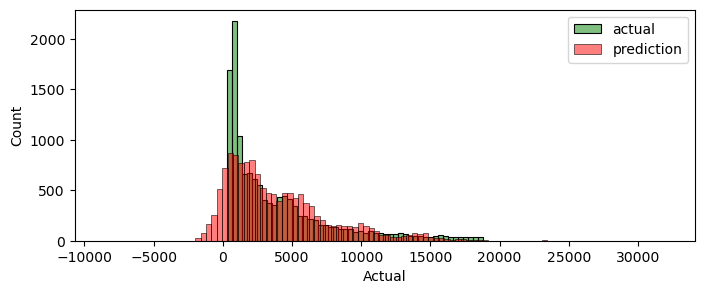

In [55]:
# plotting actual vs predictions
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='green', alpha=0.5, label="actual")
sns.histplot(output_df['LR Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()

### Training and Testing Phase (KNN Regression)

In [56]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

knn

KNeighborsRegressor()

In [57]:
%%time

# training
knn.fit(X_train_transformed, y_train)

# testing
y_test_pred = knn.predict(X_test_transformed)

# evaluation
knn_mae = mean_absolute_error(y_test, y_test_pred)

print(f"Model's Error: {knn_mae}")

Model's Error: 380.4232213072186
CPU times: total: 703 ms
Wall time: 724 ms


In [58]:
# save output
output_df['KNN Predictions'] = y_test_pred

output_df.head()

,Actual,LR Predictions,KNN Predictions
26236,15671,12106.018162,15395.6
43956,516,-296.968729,626.2
6686,4101,4053.609845,3381.2
52101,2459,2689.966714,2902.0
25469,14237,10762.219341,14408.4


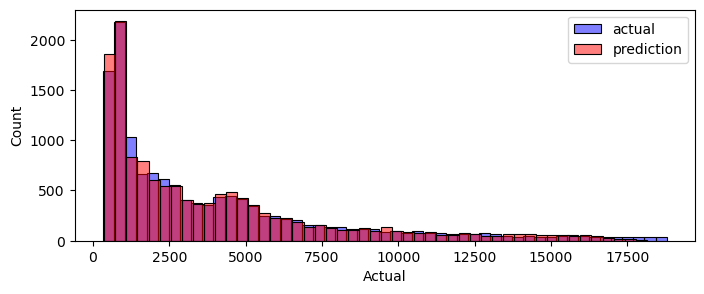

In [59]:
# plotting actual vs predictions
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['KNN Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()

### Training and Testing Phase (DT Regression)

In [60]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

dt

DecisionTreeRegressor()

In [61]:
%%time

# training
dt.fit(X_train_transformed, y_train)

# testing
y_test_pred = dt.predict(X_test_transformed)

# evaluation
dt_mae = mean_absolute_error(y_test, y_test_pred)

print(f"Model's Error: {dt_mae}")

Model's Error: 358.58583722828104
CPU times: total: 375 ms
Wall time: 393 ms


In [62]:
# save output
output_df['DT Predictions'] = y_test_pred

output_df.head()

,Actual,LR Predictions,KNN Predictions,DT Predictions
26236,15671,12106.018162,15395.6,17765.0
43956,516,-296.968729,626.2,497.0
6686,4101,4053.609845,3381.2,3993.0
52101,2459,2689.966714,2902.0,1946.0
25469,14237,10762.219341,14408.4,13787.0


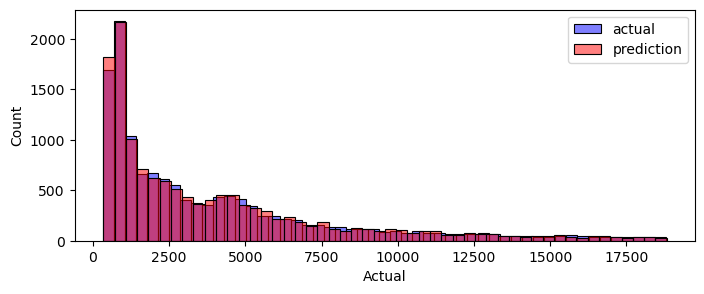

In [63]:
# plotting actual vs predictions
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['DT Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()

### Training and Testing Phase (Random Forest Regression)

In [64]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf

RandomForestRegressor()

In [65]:
%%time

# training
rf.fit(X_train_transformed, y_train)

# testing
y_test_pred = rf.predict(X_test_transformed)

# evaluation
rf_mae = mean_absolute_error(y_test, y_test_pred)

print(f"Model's Error: {rf_mae}")

Model's Error: 265.440636915802
CPU times: total: 20.6 s
Wall time: 21.3 s


In [66]:
# save output
output_df['RF Predictions'] = y_test_pred

output_df.head()

,Actual,LR Predictions,KNN Predictions,DT Predictions,RF Predictions
26236,15671,12106.018162,15395.6,17765.0,16984.08
43956,516,-296.968729,626.2,497.0,565.38
6686,4101,4053.609845,3381.2,3993.0,3826.27
52101,2459,2689.966714,2902.0,1946.0,2207.85
25469,14237,10762.219341,14408.4,13787.0,14023.82


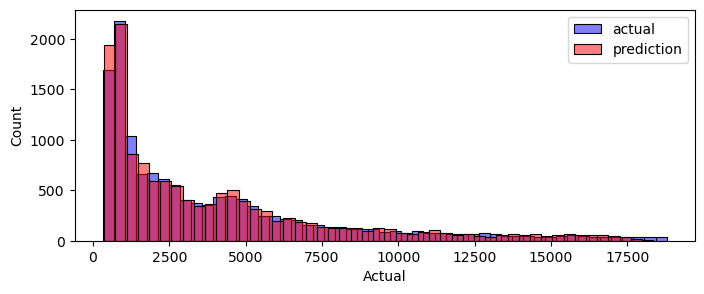

In [67]:
# plotting actual vs predictions
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['RF Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()

### Comparing all the Models

In [68]:
df_melted = pd.melt(output_df,  var_name='Model', value_name='Prediction')

df_melted.head()

,Model,Prediction
0,Actual,15671.0
1,Actual,516.0
2,Actual,4101.0
3,Actual,2459.0
4,Actual,14237.0


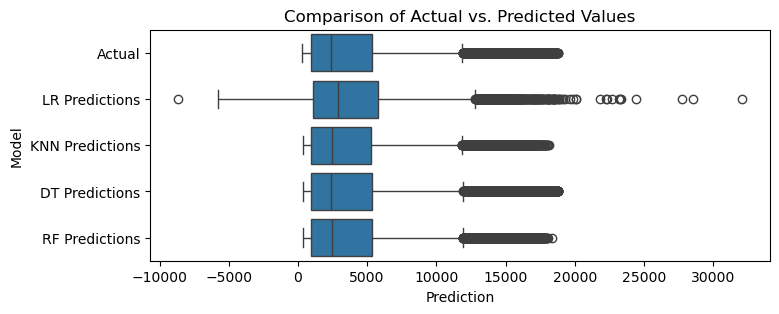

In [69]:
# plot
fig, ax = plt.subplots(figsize=(8,3))

sns.boxplot(x='Prediction', y='Model', data=df_melted)
plt.title('Comparison of Actual vs. Predicted Values')

plt.show()

### 9. Evaluation Phase

#### **1. Mean Absolute Error (MAE):**

In [70]:
from sklearn.metrics import mean_absolute_error

mae_lr = mean_absolute_error(output_df['Actual'], output_df['LR Predictions'])
mae_knn = mean_absolute_error(output_df['Actual'], output_df['KNN Predictions'])
mae_dt = mean_absolute_error(output_df['Actual'], output_df['DT Predictions'])
mae_rf = mean_absolute_error(output_df['Actual'], output_df['RF Predictions'])

print("MAE of Linear Regression:", mae_lr)
print("MAE of KNN Regression:", mae_knn)
print("MAE of Decision Tree Regression:", mae_dt)
print("MAE of Random Forest Regression:", mae_rf)

MAE of Linear Regression: 801.7927979373013
MAE of KNN Regression: 380.4232213072186
MAE of Decision Tree Regression: 358.58583722828104
MAE of Random Forest Regression: 265.440636915802


#### **2. Mean Squared Error (MSE):**

In [71]:
from sklearn.metrics import mean_squared_error

mse_lr = mean_squared_error(output_df['Actual'], output_df['LR Predictions'])
mse_knn = mean_squared_error(output_df['Actual'], output_df['KNN Predictions'])
mse_dt = mean_squared_error(output_df['Actual'], output_df['DT Predictions'])
mse_rf = mean_squared_error(output_df['Actual'], output_df['RF Predictions'])

print("MSE of Linear Regression:", mse_lr)
print("MSE of KNN Regression:", mse_knn)
print("MSE of Decision Tree Regression:", mse_dt)
print("MSE of Random Forest Regression:", mse_rf)

MSE of Linear Regression: 1503159.388838079
MSE of KNN Regression: 495653.6654380888
MSE of Decision Tree Regression: 532793.3208138586
MSE of Random Forest Regression: 278395.5359175946


#### **3. Root Mean Squared Error (RMSE):**

In [72]:
import numpy as np

rmse_lr = np.sqrt(mse_lr)
rmse_knn = np.sqrt(mse_knn)
rmse_dt = np.sqrt(mse_dt)
rmse_rf = np.sqrt(mse_rf)

print("RMSE of Linear Regression:", rmse_lr)
print("RMSE of KNN Regression:", rmse_knn)
print("RMSE of Decision Tree Regression:", rmse_dt)
print("RMSE of Random Forest Regression:", rmse_rf)

RMSE of Linear Regression: 1226.0340080267265
RMSE of KNN Regression: 704.0267505131384
RMSE of Decision Tree Regression: 729.9269284071239
RMSE of Random Forest Regression: 527.6320080487865


#### **4. R2 Score**

In [73]:
from sklearn.metrics import r2_score

r2_lr = r2_score(output_df['Actual'], output_df['LR Predictions'])
r2_knn = r2_score(output_df['Actual'], output_df['KNN Predictions'])
r2_dt = r2_score(output_df['Actual'], output_df['DT Predictions'])
r2_rf = r2_score(output_df['Actual'], output_df['RF Predictions'])

print("R2 score of Linear Regression:", r2_lr)
print("R2 score of KNN Regression:", r2_knn)
print("R2 score of Decision Tree Regression:", r2_dt)
print("R2 score of Random Forest Regression:", r2_rf)

R2 score of Linear Regression: 0.9059313389534952
R2 score of KNN Regression: 0.9689816815190876
R2 score of Decision Tree Regression: 0.9666574584999785
R2 score of Random Forest Regression: 0.9825778320652107


#### Creating a DataFrame with different metrics as rows and model names as columns

In [74]:
model_df = pd.DataFrame({
    "Linear Regression": [mae_lr, mse_lr, rmse_lr, r2_lr],
    "KNN Regression": [mae_knn, mse_knn, rmse_knn, r2_knn],
    "Decision Tree Regression": [mae_dt, mse_dt, rmse_dt, r2_dt],
    "Random Forest Regression": [mae_rf, mse_rf, rmse_rf, r2_rf]
}, index=["Mean Absolute Error (MAE)", "Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)", "R2 Score"])

model_df.round(2)

,Linear Regression,KNN Regression,Decision Tree Regression,Random Forest Regression
Mean Absolute Error (MAE),801.79,380.42,358.59,265.44
Mean Squared Error (MSE),1503159.39,495653.67,532793.32,278395.54
Root Mean Squared Error (RMSE),1226.03,704.03,729.93,527.63
R2 Score,0.91,0.97,0.97,0.98


### 10. Conclusion

While KNN and Decision Tree perform reasonably well, the Random Forest Regression outperforms them.

Hence, `Random Forest Regression` is the `best model` in this case